In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r
from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset
from matplotlib.animation import FuncAnimation


In [35]:
len(files0)

124

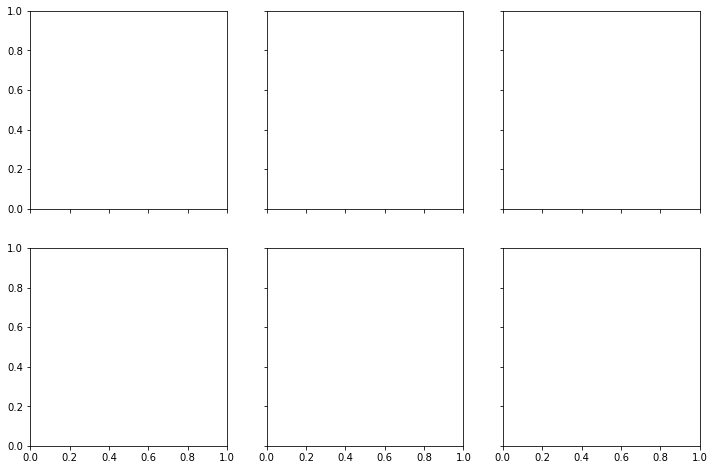

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


IndexError: index 15 is out of bounds for axis 0 with size 1

In [38]:
fig,axes = plt.subplots(2,3,figsize=(12,8),sharex=True,sharey=True)
ax = axes.ravel() 

year=2012
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp/Xingu_2018'
files0=sorted(glob.glob(path+"/energyflux*"))
files1=sorted(glob.glob(path+"/3Dfields*"))

def animate(ii):
    for jj in range(6):
        ax[jj].clear()
    
    file_energy=files0[ii][-34:] 
    file_energy_obs = path+'/'+file_energy
    file_energy_big = path+'_bigclearing/'+file_energy

    with xarray.open_dataset(file_energy_obs,decode_times=False,
                         mask_and_scale='True') as dsE_obs:
        print('ok')
        lats=dsE_obs['XLAT'][0,:,0]
        lons=dsE_obs['XLONG'][0,0,:]
    
    with xarray.open_dataset(file_energy_big,decode_times=False,
                         mask_and_scale='True') as dsE_big:
        print('ok')
        
    
    file_3D=files1[ii][-32:] 
    file_3D_obs = path+'/'+file_3D
    file_3D_big = path+'_bigclearing/'+file_3D

    with xarray.open_dataset(file_3D_obs,decode_times=False,
                         mask_and_scale='True') as ds3D_obs:
        print('ok')

    with xarray.open_dataset(file_3D_big,decode_times=False,
                         mask_and_scale='True') as ds3D_big:
        print('ok')
        
    im=ax[0].contourf(lons,lats,dsE_obs['LH'][15,:,:],cmap='PiYG_r',levels=np.arange(0,501,50))
    im=ax[1].contourf(lons,lats,dsE_big['LH'][15,:,:],cmap='PiYG_r',levels=np.arange(0,501,50))
    im=ax[2].contourf(lons,lats,dsE_big['LH'][15,:,:]-dsE_obs['LH'][15,:,:],cmap='PiYG_r',
                      levels=np.arange(-100,101,20), extend='both')

    im=ax[3].contourf(lons,lats,ds3D_obs['Q2'][15,:,:],cmap='YlGn',levels=np.linspace(0.0,0.02,10))
    ax[4].contourf(lons,lats,ds3D_big['Q2'][15,:,:],cmap='YlGn',levels=np.linspace(0,0.02,10))
    ax[5].contourf(lons,lats,ds3D_big['Q2'][15,:,:]-ds3D_obs['Q2'][15,:,:],cmap='BrBG_r',
                     levels=np.linspace(-0.005,0.0051,20),extend='both')

    #fig.colorbar(im,ax=ax)
    ax[0].set_title('Control at Day='+str(ii))
    ax[1].set_title('Big Clearing')
    ax[2].set_title('Big Clearing - Control')

    ax[3].set_xlabel('lat')
    ax[4].set_xlabel('lat')
    ax[5].set_xlabel('lat')

    ax[0].set_ylabel('lon')
    ax[3].set_ylabel('lon')
    ax2 = ax[2].twinx()
    ax2.set_ylabel('Latent Heat')
    ax5 = ax[5].twinx()
    ax5.set_ylabel('Mixing ratio at 2m')
    #fig.colorbar(im,ax=ax[3])

anim = FuncAnimation(fig, animate, interval=1,frames=123)
plt.show()
anim.save('sine_wave.gif', writer='imagemagick',fps=1)

### Latent heat with energy

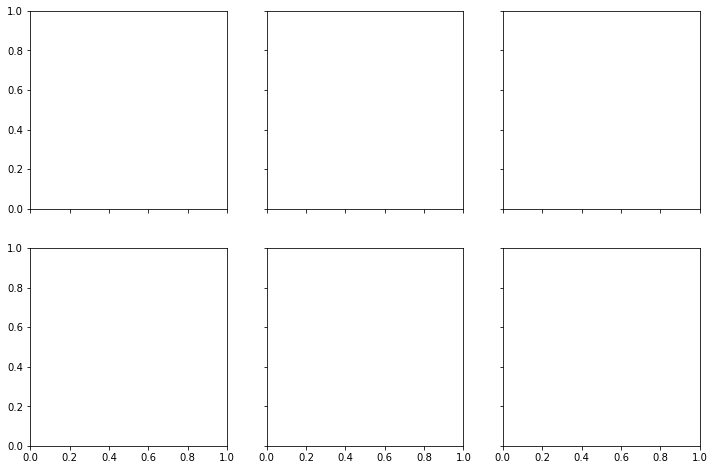

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [ ]:
fig,axes = plt.subplots(2,3,figsize=(12,8),sharex=True,sharey=True)
ax = axes.ravel() 

year=2012
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp/Xingu_2018'
files0=sorted(glob.glob(path+"/energyflux*"))
files1=sorted(glob.glob(path+"/3Dfields*"))

def animate(ii):
    for jj in range(6):
        ax[jj].clear()
    
    file_energy=files0[ii][-34:] 
    file_energy_obs = path+'/'+file_energy
    file_energy_big = path+'_bigclearing/'+file_energy

    with xarray.open_dataset(file_energy_obs,decode_times=False,
                         mask_and_scale='True') as dsE_obs:
        print('ok')
        lats=dsE_obs['XLAT'][0,:,0]
        lons=dsE_obs['XLONG'][0,0,:]
    
    with xarray.open_dataset(file_energy_big,decode_times=False,
                         mask_and_scale='True') as dsE_big:
        print('ok')
        
    
    file_3D=files1[ii][-32:] 
    file_3D_obs = path+'/'+file_3D
    file_3D_big = path+'_bigclearing/'+file_3D

   # with xarray.open_dataset(file_3D_obs,decode_times=False,
   #                      mask_and_scale='True') as ds3D_obs:
   #     print('ok')

    #with xarray.open_dataset(file_3D_big,decode_times=False,
    #                     mask_and_scale='True') as ds3D_big:
    #    print('ok')
        
    im=ax[0].contourf(lons,lats,dsE_obs['PBLH'][15,:,:],cmap='PiYG_r')
    im=ax[1].contourf(lons,lats,dsE_big['PBLH'][15,:,:],cmap='PiYG_r')
    im=ax[2].contourf(lons,lats,dsE_big['PBLH'][15,:,:]-dsE_obs['PBLH'][15,:,:],cmap='PiYG_r')

    im=ax[3].contourf(lons,lats,dsE_obs['OLR'][15,:,:],cmap='YlOrRd',levels=np.linspace(200,401,10))
    ax[4].contourf(lons,lats,dsE_big['OLR'][15,:,:],cmap='YlOrRd',levels=np.linspace(200,401,10))
    ax[5].contourf(lons,lats,dsE_big['OLR'][15,:,:]-dsE_obs['OLR'][15,:,:],cmap='PiYG_r',
                     levels=np.linspace(-50,51,20))

    #fig.colorbar(im,ax=ax)
    ax[0].set_title('Control at Day='+str(ii))
    ax[1].set_title('Big Clearing')
    ax[2].set_title('Big Clearing - Control')

    ax[3].set_xlabel('lat')
    ax[4].set_xlabel('lat')
    ax[5].set_xlabel('lat')

    ax[0].set_ylabel('lon')
    ax[3].set_ylabel('lon')
    ax2 = ax[2].twinx()
    ax2.set_ylabel('Latent Heat')
    ax5 = ax[5].twinx()
    ax5.set_ylabel('Mixing ratio at 2m')
    #fig.colorbar(im,ax=ax[3])

anim = FuncAnimation(fig, animate, interval=1,frames=100)
plt.show()
anim.save('PBLH_OLR.gif', writer='imagemagick',fps=1)

ok
ok


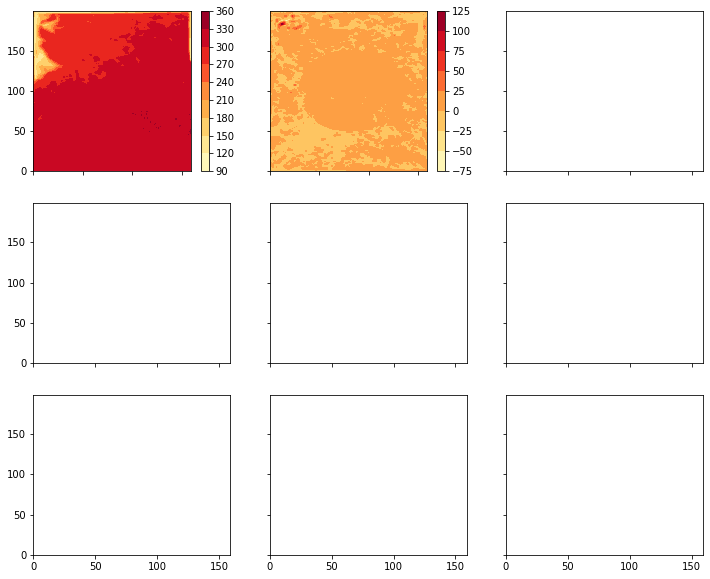

In [41]:
### 201407
fig,axes = plt.subplots(3,3,figsize=(12,10),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp/'
file = path+'Xingu_2018/energyflux_d01_2018-08-29_00:00:00'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds:
    print('ok')

file = path+'Xingu_2018_bigclearing/energyflux_d01_2018-08-29_00:00:00'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')

im0=axes[0].contourf(ds['OLR'][15,:,:],cmap='YlOrRd')
fig.colorbar(im0,ax=axes[0])

im0=axes[1].contourf(ds1['OLR'][15,:,:]-ds['OLR'][15,:,:],cmap='YlOrRd')
fig.colorbar(im0,ax=axes[1])

### Change in LH of all the big clearing exps.

ok


Text(0.5, 1.0, 'Average of the above')

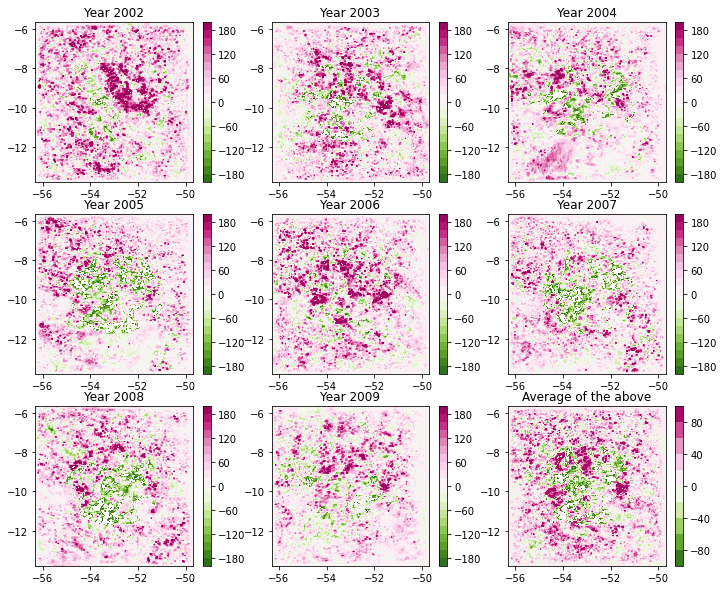

In [7]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'dif.energy.'+str(year)+'.bigclearing.multidaymean.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        lats=ds['XLAT'][0,:,0]
        lons=ds['XLONG'][0,0,:]
        
     
    im=axes[ii].contourf(lons,lats,ds['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-200,201,20))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])

file = path+'dif.energy.bigclearing.ensmean.nc'
with xarray.open_dataset(file,decode_times=False,
                            mask_and_scale='True') as ds:
    print('ok') 
im=axes[8].contourf(lons,lats,ds['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-100,101,20))
fig.colorbar(im,ax=axes[8])
axes[8].set_title('Average of the above')
#for ii in range(9):
    #axes[ii].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])


#### Changes in LH of each year

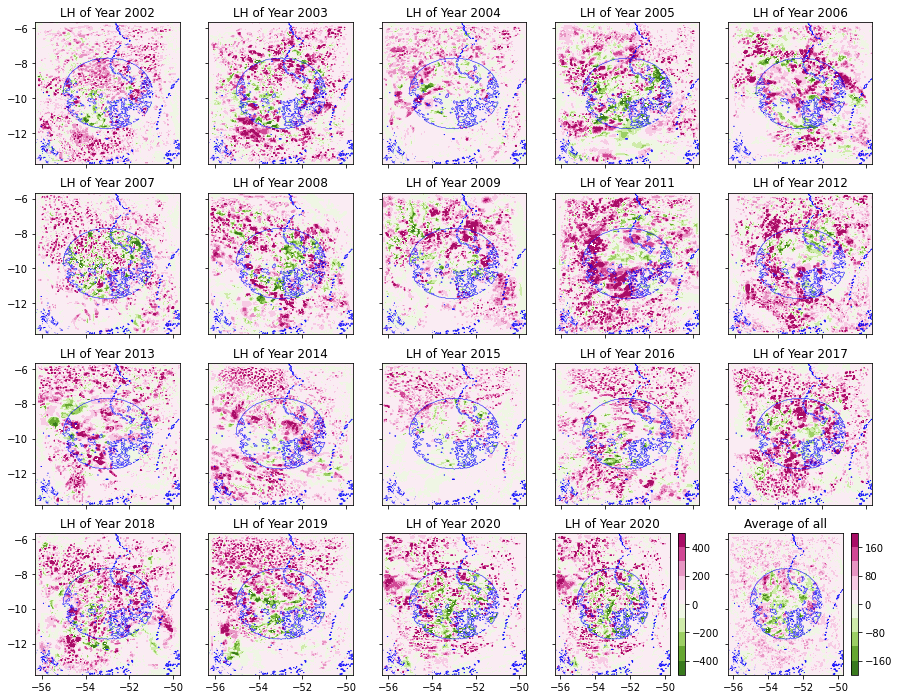

In [35]:
fig,axes = plt.subplots(4,5,figsize=(15,12),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
file = path+'dif.energy.bigclearing.all.nc'
with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]
        
years=np.concatenate((np.arange(2002,2010),np.arange(2011,2021)))
for ii,year in enumerate(years):
    im=axes[ii].contourf(lons,lats,ds['LH'][ii,16,:,:],cmap='PiYG_r',levels=np.arange(-500,501,100))
    axes[ii].set_title('LH of Year '+str(year))

im=axes[18].contourf(lons,lats,ds['LH'][ii,16,:,:],cmap='PiYG_r',levels=np.arange(-500,501,100))
fig.colorbar(im,ax=axes[18])
axes[18].set_title('LH of Year '+str(year))

im=axes[19].contourf(lons,lats,ds['LH'][:,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-200,201,40))
fig.colorbar(im,ax=axes[19])
axes[19].set_title('Average of all')

for ii in range(20):
    axes[ii].contour(lons,lats,lu_index1,colors='b',linewidths=0.5,levels=[11.5,12.5])


### How many ensemble members will be enough

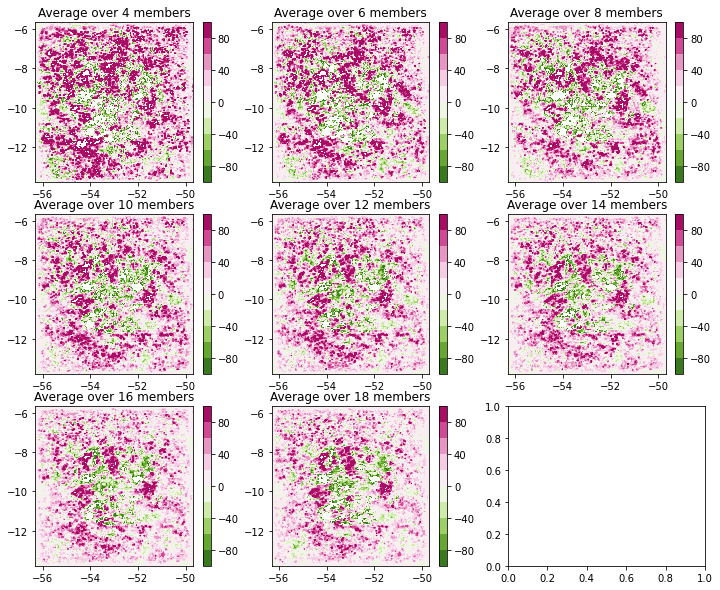

In [10]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
file = path+'dif.energy.bigclearing.all.nc'
with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]
        
for ii,jj in enumerate(np.arange(4,20,2)):
    im=axes[ii].contourf(lons,lats,ds['LH'][0:jj,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-100,101,20))
    axes[ii].set_title('Average over '+str(jj)+' members')
    fig.colorbar(im,ax=axes[ii])

### Differences between big, medium, and small clearing. 

ok
ok


Text(0.5, 1.0, 'Change in LH at local noon')

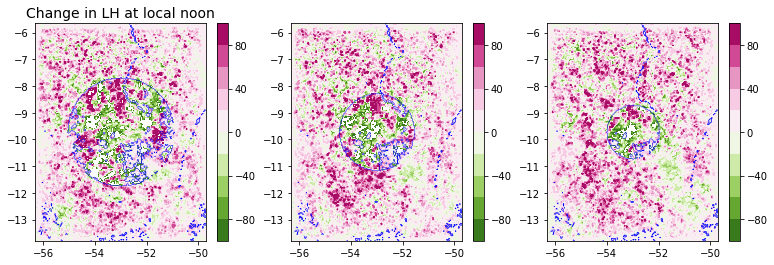

In [29]:
fig,axes = plt.subplots(1,3,figsize=(13,4))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
file1 = path+'dif.energy.bigclearing.all.nc'
file2 = path+'dif.energy.mediumclearing.all.nc'
file3 = path+'dif.energy.smallclearing.all.nc'

with xarray.open_dataset(file1,decode_times=False,
                             mask_and_scale='True') as ds1:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]

with xarray.open_dataset(file2,decode_times=False,
                             mask_and_scale='True') as ds2:
    print('ok')
with xarray.open_dataset(file3,decode_times=False,
                             mask_and_scale='True') as ds3:
    print('ok')

im1=axes[0].contourf(lons,lats,ds1['LH'][:,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-100,101,20))
im2=axes[1].contourf(lons,lats,ds2['LH'][:,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-100,101,20))
im3=axes[2].contourf(lons,lats,ds3['LH'][:,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-100,101,20))

fig.colorbar(im1,ax=axes[0])
fig.colorbar(im2,ax=axes[1])
fig.colorbar(im3,ax=axes[2])
axes[0].contour(lons,lats,lu_index1,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[1].contour(lons,lats,lu_index2,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[2].contour(lons,lats,lu_index3,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[0].set_title('Change in LH at local noon',fontsize=14)

Text(0.5, 1.0, 'Change in daily-averaged LH')

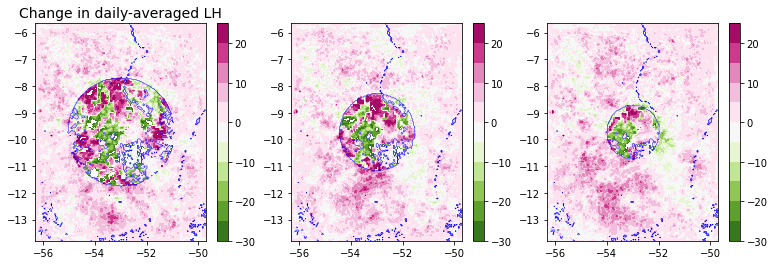

In [30]:
### Change in daily-averaged LH
fig,axes = plt.subplots(1,3,figsize=(13,4))#,sharex=True,sharey=True)
axes = axes.ravel()   
im1=axes[0].contourf(lons,lats,ds1['LH'][:,:,:,:].mean(axis=0).mean(axis=0),cmap='PiYG_r',levels=np.arange(-30,30,5))
im2=axes[1].contourf(lons,lats,ds2['LH'][:,:,:,:].mean(axis=1).mean(axis=0),cmap='PiYG_r',levels=np.arange(-30,30,5))
im3=axes[2].contourf(lons,lats,ds3['LH'][:,:,:,:].mean(axis=1).mean(axis=0),cmap='PiYG_r',levels=np.arange(-30,30,5))

fig.colorbar(im1,ax=axes[0])
fig.colorbar(im2,ax=axes[1])
fig.colorbar(im3,ax=axes[2])

axes[0].contour(lons,lats,lu_index1,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[1].contour(lons,lats,lu_index2,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[2].contour(lons,lats,lu_index3,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[0].set_title('Change in daily-averaged LH',fontsize=14)

### Change in HFX of all the big clearing exps.

ok


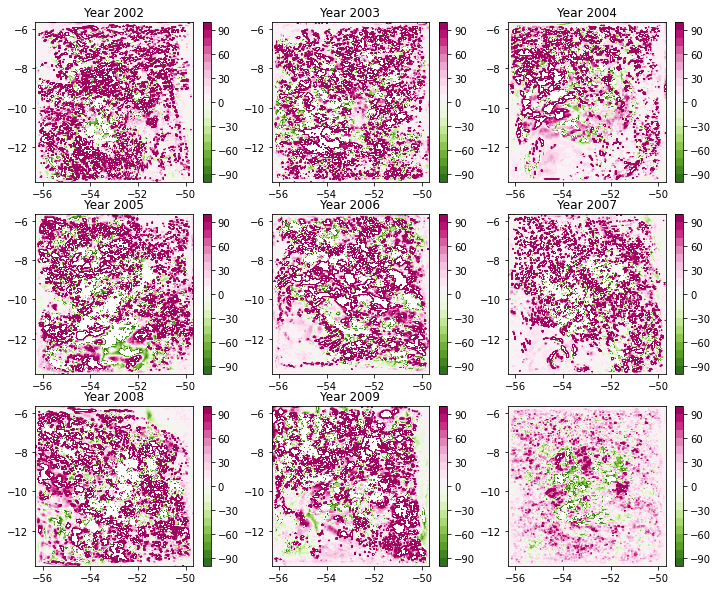

In [16]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'dif.energy.'+str(year)+'.bigclearing.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        lats=ds['XLAT'][0,:,0]
        lons=ds['XLONG'][0,0,:]
        
     
    im=axes[ii].contourf(lons,lats,ds['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-100,101,10))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])

file = path+'dif.energy.bigclearing.ensmean.nc'
with xarray.open_dataset(file,decode_times=False,
                            mask_and_scale='True') as ds:
    print('ok') 
    im=axes[8].contourf(lons,lats,ds['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-100,101,10))
    fig.colorbar(im,ax=axes[8])
    
#for ii in range(9):
    #axes[ii].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])


### Change in TSK of all the big clearing exps.

ok
ok
ok
ok
ok
ok
ok
ok
ok


<ipython-input-32-31ae1965a36b>:23: UserWarning: The following kwargs were not used by contour: 'linewidth'
  axes[ii].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])


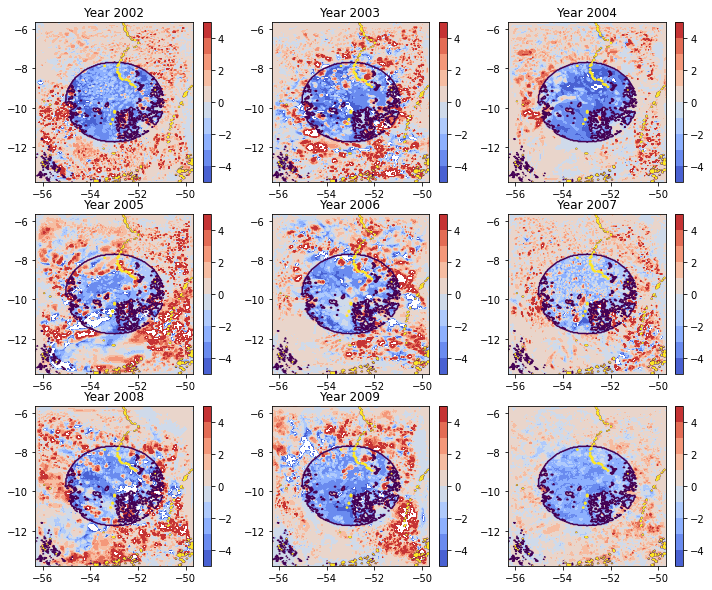

In [32]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'dif.TSK.'+str(year)+'.bigclearing.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        print('ok')
     
    im=axes[ii].contourf(lons,lats,ds['TSK'][16,:,:],cmap='coolwarm',levels=np.arange(-5,6,1))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])

file = path+'dif.TSK.bigclearing.ensmean.nc'
with xarray.open_dataset(file,decode_times=False,
                            mask_and_scale='True') as ds:
    print('ok') 
    im=axes[8].contourf(lons,lats,ds['TSK'][16,:,:],cmap='coolwarm',levels=np.arange(-5,6,1))
    fig.colorbar(im,ax=axes[8])
    
for ii in range(9):
    axes[ii].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])


### Change in Rnet

### Change in LH of a single year

In [3]:
### load in the LU_INDEX
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
year=2002
with xarray.open_dataset(path+'Xingu_'+str(year)+'_bigclearing/'+'/3Dfields_d01_'+str(year)+'-11-10_00:00:00',
                         decode_times=False,mask_and_scale='True') as ds:
    lu_index1=ds['LU_INDEX'][0,:,:]
with xarray.open_dataset(path+'Xingu_'+str(year)+'_mediumclearing/'+'/3Dfields_d01_'+str(year)+'-11-10_00:00:00',
                         decode_times=False,mask_and_scale='True') as ds:
    lu_index2=ds['LU_INDEX'][0,:,:]
with xarray.open_dataset(path+'Xingu_'+str(year)+'_smallclearing/'+'/3Dfields_d01_'+str(year)+'-11-10_00:00:00',
                         decode_times=False,mask_and_scale='True') as ds:
    lu_index3=ds['LU_INDEX'][0,:,:]

/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/Xingu_2003/energyflux_d01_2003-11-10_00:00:00
ok
ok
ok
ok


<ipython-input-8-c54462c70b14>:32: UserWarning: The following kwargs were not used by contour: 'linewidth'
  axes[1].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])
<ipython-input-8-c54462c70b14>:33: UserWarning: The following kwargs were not used by contour: 'linewidth'
  axes[2].contour(lons,lats,lu_index2,'-k',linewidth=2,levels=[11,13])
<ipython-input-8-c54462c70b14>:34: UserWarning: The following kwargs were not used by contour: 'linewidth'
  axes[3].contour(lons,lats,lu_index3,'-k',linewidth=2,levels=[11,13])


Text(0.5, 1.0, 'Small Clearing')

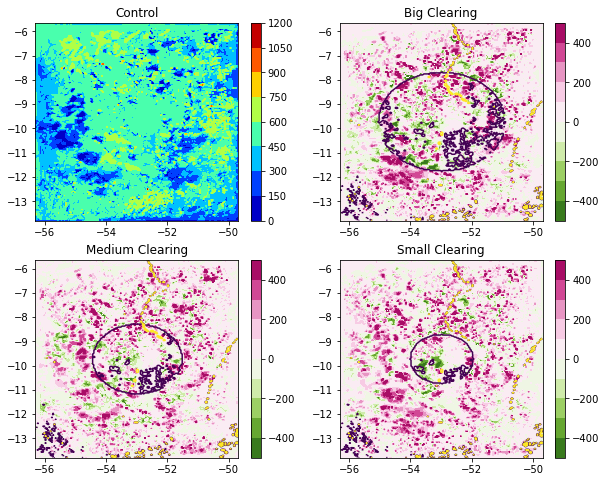

In [8]:
### 201407
fig,axes = plt.subplots(2,2,figsize=(10,8))#,sharex=True,sharey=True)
axes = axes.ravel()   

year=2003
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day'
file_obs = path+'/Xingu_'+str(year)+'/energyflux_d01_'+str(year)+'-11-10_00:00:00'
file_big = path+'/Xingu_'+str(year)+'_bigclearing/'+'/energyflux_d01_'+str(year)+'-11-10_00:00:00'
file_medium = path+'/Xingu_'+str(year)+'_mediumclearing/'+'/energyflux_d01_'+str(year)+'-11-10_00:00:00'
file_small = path+'/Xingu_'+str(year)+'_smallclearing/'+'/energyflux_d01_'+str(year)+'-11-10_00:00:00'


print(file_obs)

with xarray.open_dataset(file_obs,decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
with xarray.open_dataset(file_big,decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
with xarray.open_dataset(file_medium,decode_times=False,
                         mask_and_scale='True') as ds2:
    print('ok')
with xarray.open_dataset(file_small,decode_times=False,
                         mask_and_scale='True') as ds3:
    print('ok')
     
im0=axes[0].contourf(lons,lats,ds0['LH'][16,:,:],cmap='jet')
im1=axes[1].contourf(lons,lats,ds1['LH'][16,:,:]-ds0['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-500,501,100))
im2=axes[2].contourf(lons,lats,ds2['LH'][16,:,:]-ds0['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-500,501,100))
im3=axes[3].contourf(lons,lats,ds3['LH'][16,:,:]-ds0['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-500,501,100))
axes[1].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])
axes[2].contour(lons,lats,lu_index2,'-k',linewidth=2,levels=[11,13])
axes[3].contour(lons,lats,lu_index3,'-k',linewidth=2,levels=[11,13])

fig.colorbar(im0,ax=axes[0])
fig.colorbar(im1,ax=axes[1])
fig.colorbar(im2,ax=axes[2])
fig.colorbar(im3,ax=axes[3])
axes[0].set_title('Control')
axes[1].set_title('Big Clearing')
axes[2].set_title('Medium Clearing')
axes[3].set_title('Small Clearing')